# Business Problem:
Banks face significant losses when customers default on their loans, which in turn negatively impacts the economic growth of the country. In order to address this problem, a data scientist is needed to conduct an in-depth analysis of loan data to identify the factors that influence loan defaults. The goal of this project is to develop a marketing plan that will enable banks to contact borrowers and minimize losses. To achieve this goal, we will be utilizing various data science techniques, including logistic regression, decision tree, random forest, and Xgboost. This project will be considered a binary classification problem, where we aim to identify whether a client will default on their loan or not. The insights gained from this analysis will be used to inform decision-making and mitigate losses for banks and investors while promoting economic growth.


In the context of marketing, the focus is typically on maximizing the number of true positives (i.e., correctly identifying potential customers who are likely to be interested in the product or service being offered) and minimizing the number of false negatives (i.e., failing to identify potential customers who would be interested in the product or service). In other words, the goal is to identify the most promising leads and avoid missing out on potential customers.

To achieve this goal, marketers typically use metrics such as precision, recall, F1-score, and AUC-ROC, which provide a more nuanced measure of the model's performance in identifying the target audience. These metrics can help marketers identify the most promising segments of the market and tailor their marketing messages accordingly, to maximize the chances of converting potential customers into actual customers. 

### Stakeholder: Chase Bank

# Data Understanding:
https://www.kaggle.com/datasets/hemanthsai7/loandefault?resource=download

MachineHack has created a training dataset of 67,463 rows and 35 columns and a testing dataset of 28,913 rows and 34 columns. 

`ID` - unique identifier for each loan application

`Loan Amount` - the amount requested by the borrower

`Funded Amount` - the amount funded by investors for the loan

`Funded Amount Investor` - the amount funded by investors for the loan

`Term` - the length of the loan term in months

`Batch Enrolled` - the batch enrollment method for the loan

`Interest Rate` - the interest rate on the loan

`Grade` - the Lending Club assigned loan grade

`Sub Grade` - the Lending Club assigned loan subgrade

`Employment Duration` - the employment length of the borrower

`Home Ownership` - the type of home ownership of the borrower

`Verification Status` - indicates if the borrower’s income was verified

`Loan Title` - the title of the loan as provided by the borrower

`Debit to Income` - the borrower’s debt-to-income ratio

`Delinquency - two years` - the number of times the borrower has been delinquent in the past two years

`Inquires - six months` - the number of inquiries made on the borrower’s credit in the past six months

`Open Account` - the number of open credit lines in the borrower's credit file

`Public Record` - the number of derogatory public records on the borrower's credit file

`Revolving Balance` - the balance on the borrower's revolving credit accounts

`Revolving Utilities` - the amount of the borrower's revolving credit that is currently in use

`Total Accounts` - the total number of credit lines the borrower has

`Initial List Status` - the initial listing status of the loan

`Total Received Interest` - total interest received to date

`Total Received Late Fee` - total late fees received to date

`Recoveries` - post charge off gross recovery

`Collection Recovery Fee` - post charge off collection fee

`Collection 12 months Medical` - number of collections in medical categories in the last 12 months

`Application Type` - indicates whether the loan is an individual or joint application

`Last week Pay` - the last week’s payment on the loan

`Total Collection Amount` - total amount due after the charged off

`Total Current Balance` - total current balance of all accounts

`Total Revolving Credit Limit` - total revolving credit limit

`Loan Status` - current status of the loan

`Debt-to-Income Ratio` - the borrower's debt-to-income ratio

`Credit Utilization Ratio` - the borrower's credit utilization ratio

`Time Since Last Delinquency` - the number of months since the borrower's last delinquency


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, log_loss, classification_report, accuracy_score,  roc_auc_score, roc_curve, auc

In [2]:
train = pd.read_csv('Train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

### Inspecting Data:
There seems to be no missing values in our dataset.

the following columns are **categorical** :

- Batch Enrolled
- Grade
- Employment Duration
- Verification Status
- Loan Title
- Initial List Status
- Application Type

The rest are numerical.

In [4]:
#Seeing the number of unique values
train.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

In [5]:
# Account Delinquent and Payment plan has only one value which is irrelavent hence drop it
train.drop(['Accounts Delinquent','Payment Plan'],axis=1,inplace=True)

In [6]:
 # creating debt-to-income ratio column
train['Debt-to-Income Ratio'] = train['Debit to Income'] / train['Loan Amount']

In [7]:
 # creating Credit Utilization Ratio column
train['Credit Utilization Ratio'] = train['Revolving Balance'] / train['Total Revolving Credit Limit']


In [8]:
# creating Time Since Last Deliquency Column
current_year = 2023 # Replace with the current year
train['Time Since Last Delinquency'] = current_year - train['Delinquency - two years']


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Loan Title                    67463 non-null  object 
 13  D

## 0 = Not in default
## 1 = in default




In [10]:
train['Loan Status'].value_counts() #Training ddata is Highly imbalanced dataset 0 refer
zero=len(train[train['Loan Status']==0])/len(train) * 100
one = 100 - zero
print('{}% of values are 0   \n {}% values are 1'.format(round(zero,2),round(one,2)))


90.75% of values are 0   
 9.25% values are 1


In [11]:
# Select object type data and numerical data columns seperately
cate = [i for i in train.select_dtypes(include='object').columns]
num = [i for i in train.select_dtypes(exclude='object').columns]

In [12]:
# Calculate the correlation matrix
corr_matrix = train.corr()

# Select the column corresponding to the target variable
target_corr = corr_matrix['Loan Status']

# Sort the correlations in descending order
sorted_correlations = target_corr.abs().sort_values(ascending=False)

# Print the top 10 most correlated features
print(sorted_correlations.head(48))

Loan Status                     1.000000
Public Record                   0.010590
Delinquency - two years         0.009990
Time Since Last Delinquency     0.009990
Total Current Balance           0.009828
Total Received Late Fee         0.009365
Debt-to-Income Ratio            0.008044
Total Collection Amount         0.007892
Open Account                    0.007073
Last week Pay                   0.006117
Credit Utilization Ratio        0.005971
Loan Amount                     0.004473
Revolving Utilities             0.004120
Collection Recovery Fee         0.003828
Home Ownership                  0.003716
Term                            0.003410
Debit to Income                 0.003057
Interest Rate                   0.002900
Total Received Interest         0.001680
Total Revolving Credit Limit    0.001454
Funded Amount                   0.001364
Revolving Balance               0.001073
Collection 12 months Medical    0.000686
Recoveries                      0.000652
Inquires - six m

# Public Record

Text(0, 0.5, 'Percentage')

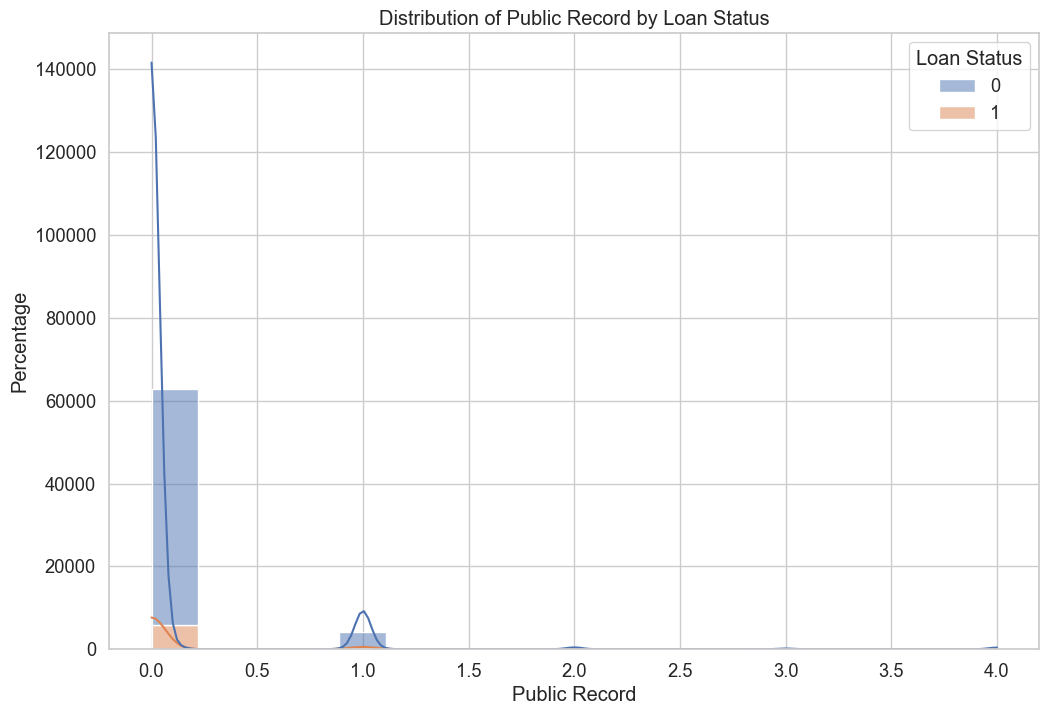

In [13]:
# Set up the figure
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 8))

# Create the visualization
sns.histplot(data=train, x="Public Record", hue="Loan Status", multiple="stack", kde=True, ax=ax)



# Add a title and axis labels
plt.title("Distribution of Public Record by Loan Status")
plt.xlabel("Public Record")
plt.ylabel("Percentage")

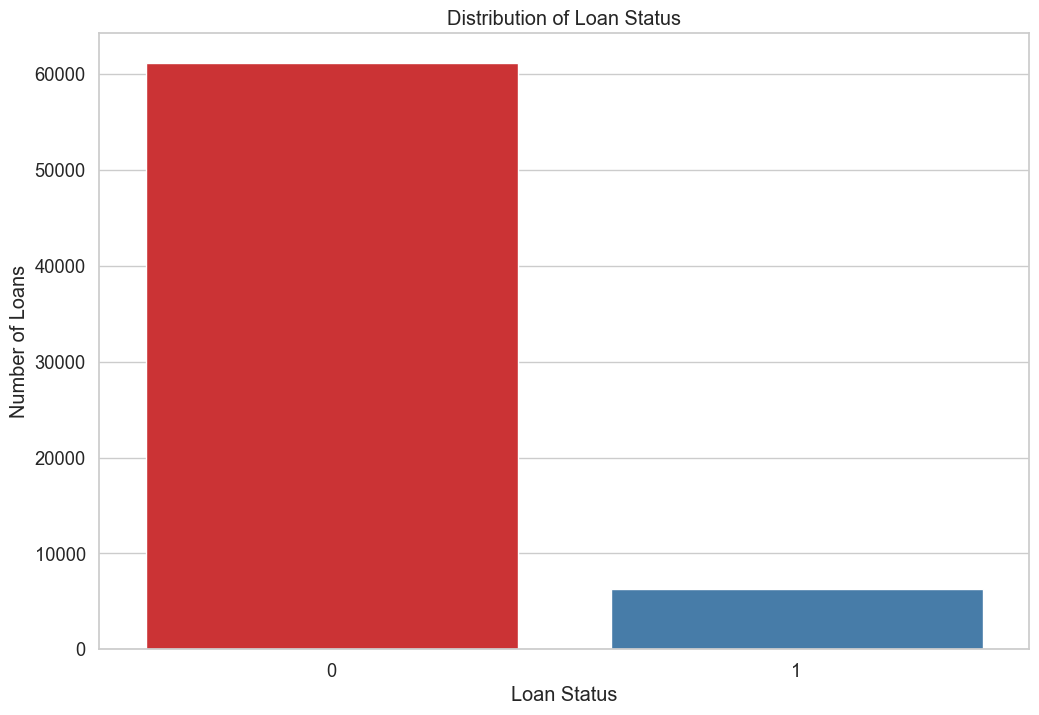

In [14]:
# Create the visualization
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=train, x='Loan Status', palette='Set1')
plt.title('Distribution of Loan Status')
plt.ylabel('Number of Loans')
plt.xlabel('Loan Status')



plt.show()

# Deliquency

Text(0, 0.5, 'Percentage')

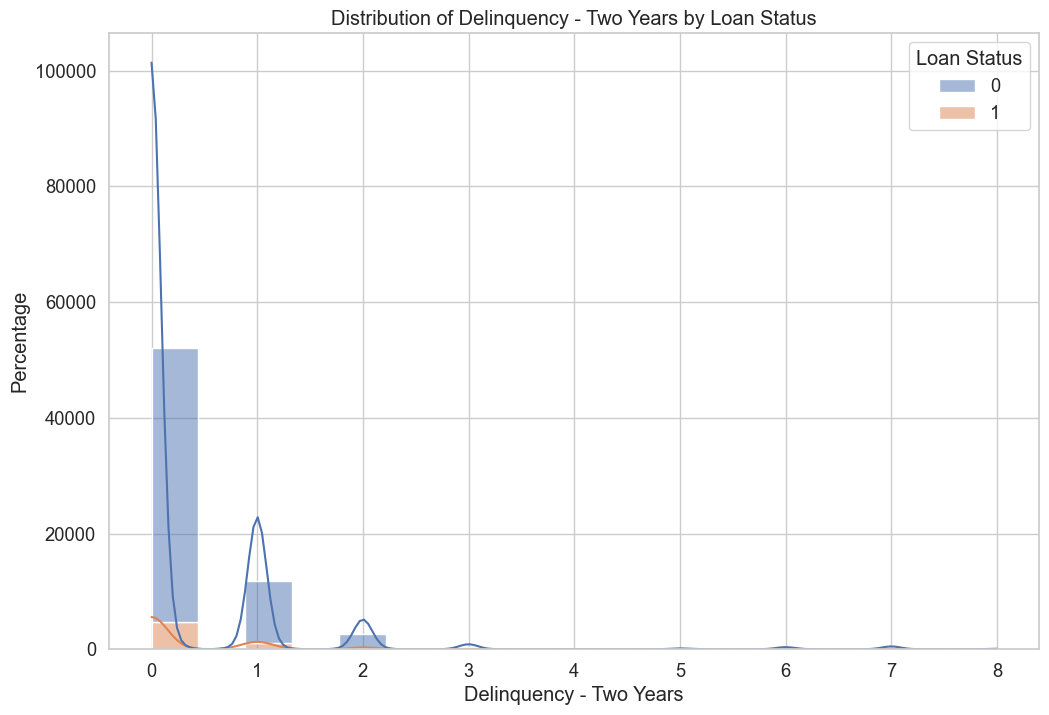

In [15]:
# Set up the figure
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 8))

# Create the visualization
sns.histplot(data=train, x="Delinquency - two years", hue="Loan Status", multiple="stack", kde=True, ax=ax)


# Add a title and axis labels
plt.title("Distribution of Delinquency - Two Years by Loan Status")
plt.xlabel("Delinquency - Two Years")
plt.ylabel("Percentage")


# Total Current Balance

Text(0, 0.5, 'Percentage')

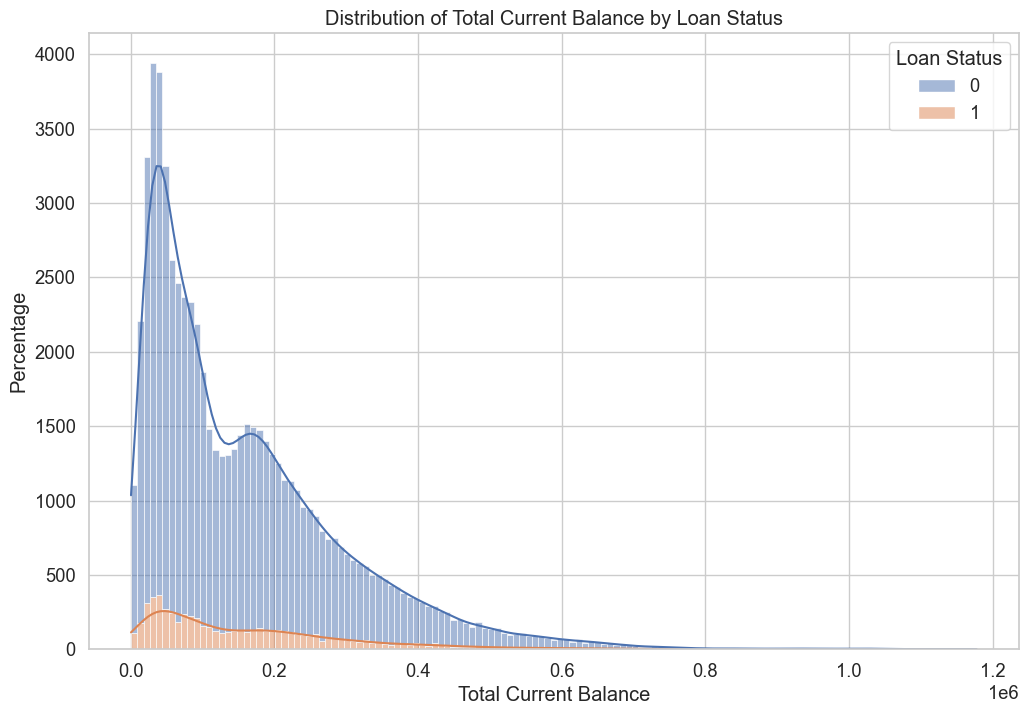

In [16]:
# Set up the figure
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 8))

# Create the visualization
sns.histplot(data=train, x="Total Current Balance", hue="Loan Status", multiple="stack", kde=True, ax=ax)



# Add a title and axis labels
plt.title("Distribution of Total Current Balance by Loan Status")
plt.xlabel("Total Current Balance")
plt.ylabel("Percentage")


# Late Fee

Text(0.5, 1.0, 'Loan Amount vs Interest Rate by Loan Status')

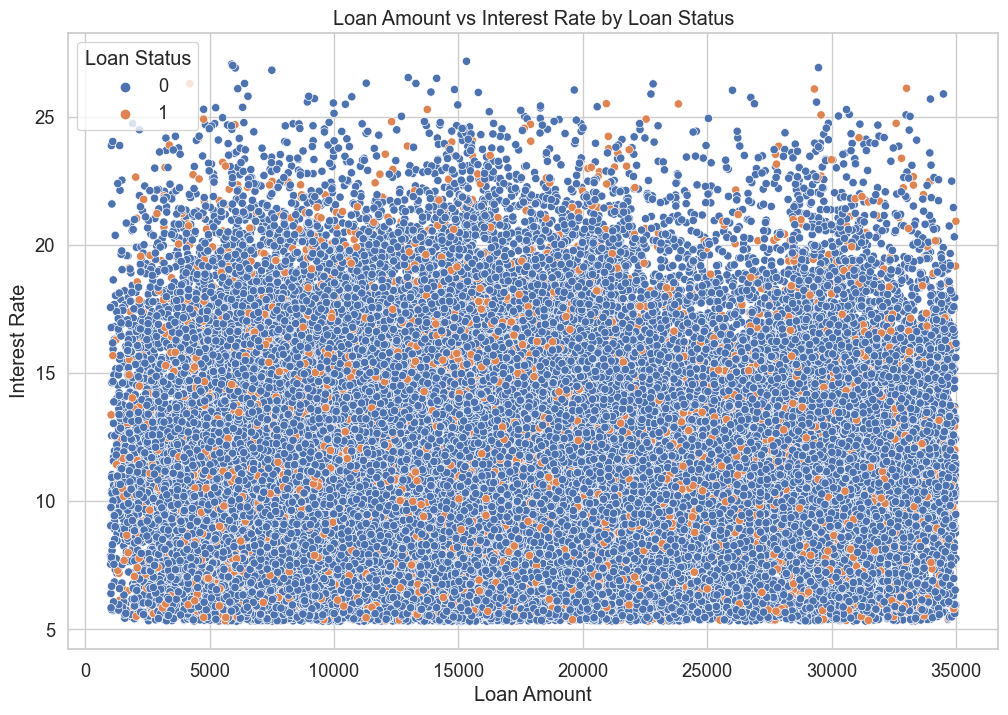

In [17]:
# Set up the figure
sns.set(style="whitegrid", font_scale=1.2)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create the visualization
sns.scatterplot(x="Loan Amount", y="Interest Rate", hue="Loan Status", data=train, ax=ax)

# Set the labels and title
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Interest Rate")
ax.set_title("Loan Amount vs Interest Rate by Loan Status")


# Distribution of loan amount

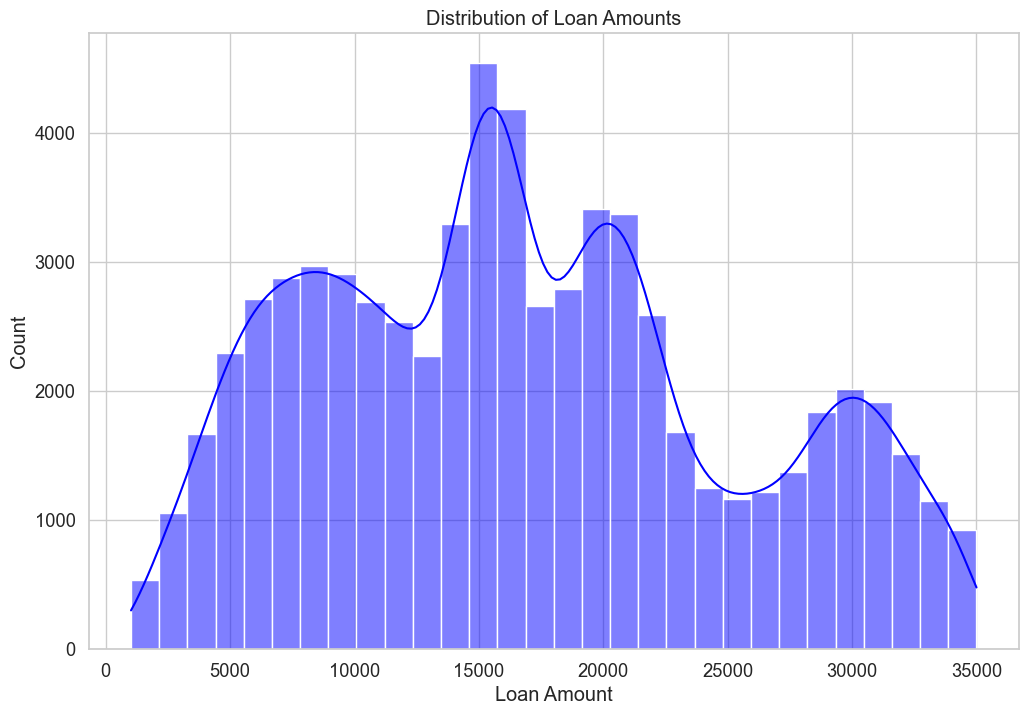

In [18]:
sns.set(style="whitegrid", font_scale=1.2)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create the visualization
sns.histplot(data=train, x='Loan Amount', kde=True, bins=30, color='blue')

# Set the axis labels
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Amounts')

plt.show()
plt.show()

# Loan Status by ownership

<AxesSubplot: xlabel='Loan Status', ylabel='Loan Amount'>

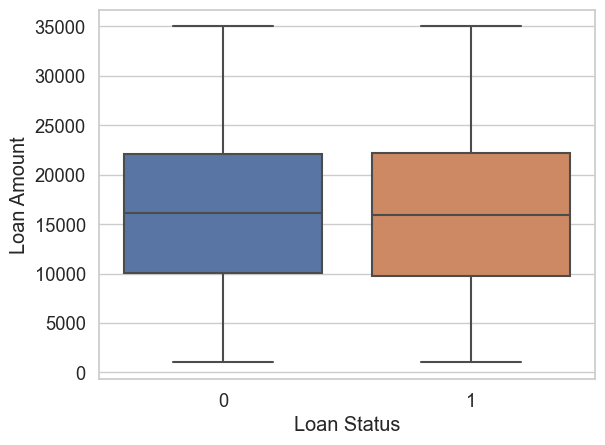

In [19]:
sns.boxplot(x='Loan Status', y='Loan Amount', data=train)


In [20]:
# Lets encode the Batch Enrolled, Sub Grade, Loan titles by the mean value of Loan Status

cols = [i for i in cate if train[i].nunique()>10]

for feature in cols:
    g = dict(train.groupby(feature)['Loan Status'].mean())
    train[feature] = train[feature].replace(g)

In [21]:
# Perform OneHot Encoding for the remaining categorical features
train = pd.get_dummies(train)

print(train.shape) 

(67463, 48)


# Modeling:
the method that we will use to adress the class imbalance in the training data is Random Over sampling. Random oversampling involves randomly duplicating the minority class samples in the dataset until the proportion of the positive and negative classes becomes balanced. This technique increases the representation of the minority class in the dataset and helps the model learn better the features that distinguish the minority class from the majority class.

In [22]:
#Splitting data into train and test
X = train.drop('Loan Status', axis=1)
y = train['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.7)

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted to the training data
X_test = scaler.transform(X_test)



In [24]:
from imblearn.over_sampling import RandomOverSampler

# Initialize a RandomOverSampler object
oversample = RandomOverSampler(sampling_strategy='minority')


# Viewing original y_train class distribution
print(y_train.value_counts()) 

# Fitting SMOTE to training data
X_train_resampled, y_train_resampled =oversample.fit_resample(X_train, y_train) 

# Previewing synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

0    42842
1     4382
Name: Loan Status, dtype: int64
0    42842
1    42842
Name: Loan Status, dtype: int64


In [25]:

# Get the column names from the original X dataframe
column_names = X.columns

# Create a new dataframe from the resampled X_train data with the column names
scaled_df_train = pd.DataFrame(X_train_resampled, columns=column_names)

# Display the first 5 rows of the new dataframe
scaled_df_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Employment Duration_MORTGAGE,Employment Duration_OWN,Employment Duration_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Initial List Status_f,Initial List Status_w,Application Type_INDIVIDUAL,Application Type_JOINT
0,-0.945715,1.556170,-0.921097,-0.778757,0.248885,0.502403,-0.268026,0.491175,1.353041,0.117407,...,0.927214,-0.33948,-0.74829,1.770037,-0.981370,-0.604229,1.079695,-1.079695,0.042213,-0.042213
1,1.203992,0.117151,0.848428,-0.421333,-0.046804,-1.081429,-0.689692,0.162498,1.791153,-0.160782,...,-1.078500,-0.33948,1.33638,-0.564960,1.018984,-0.604229,-0.926187,0.926187,0.042213,-0.042213
2,-1.112032,-1.604310,-0.610351,1.141852,-0.046804,-0.049456,-0.428740,-0.164403,0.315805,0.117407,...,0.927214,-0.33948,-0.74829,-0.564960,-0.981370,1.655003,-0.926187,0.926187,0.042213,-0.042213
3,0.719891,-1.142349,0.013964,-0.531500,0.248885,-2.002368,0.057693,-0.793033,-0.762472,-0.160782,...,0.927214,-0.33948,-0.74829,-0.564960,1.018984,-0.604229,-0.926187,0.926187,0.042213,-0.042213
4,0.557717,1.363128,-0.603236,-1.083681,0.248885,-0.717966,-0.755488,-0.093675,-0.763250,0.117407,...,0.927214,-0.33948,-0.74829,-0.564960,-0.981370,1.655003,1.079695,-1.079695,0.042213,-0.042213


In [26]:
# This line of code prints the count of each class in the target variable of the training data.


print(pd.Series(y_train_resampled).value_counts())


0    42842
1    42842
Name: Loan Status, dtype: int64


In [27]:
#Printing mean of y_train should be.5
y_train_resampled.mean()

0.5

# Baseline Model: Logistic Regression
The SGDClassifier with 'log' loss function is a linear classification algorithm that performs logistic regression using stochastic gradient descent (SGD) optimization. Logistic regression is a type of regression analysis used to predict a binary outcome (such as 0 or 1) based on one or more predictor variables. It models the probability of the outcome as a function of the predictor variables, and the goal is to find the best set of coefficients that maximizes the likelihood of observing the outcome given the predictor variables.



In [28]:

from sklearn.linear_model  import SGDClassifier

In [29]:
# Fit the logistic regression model on the training data
lr_model =  SGDClassifier(loss='log', random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)


SGDClassifier(loss='log', random_state=42)

In [30]:
# Predict the class labels on the testing data
y_pred = lr_model.predict(X_test)

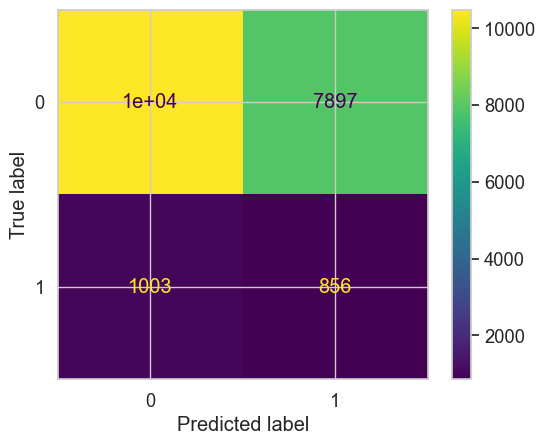

              precision    recall  f1-score   support

           0       0.91      0.57      0.70     18380
           1       0.10      0.46      0.16      1859

    accuracy                           0.56     20239
   macro avg       0.51      0.52      0.43     20239
weighted avg       0.84      0.56      0.65     20239



In [31]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_test, y_pred))

# Interpeting Results: 
- True positive: 10,004 (actual non-defaults correctly identified as non-defaults)
- True negative: 856 (actual defaults correctly identified as defaults)
- False negative: 1003 (actual defaults incorrectly identified as non-defaults)
- False positive: 7897 (actual non-defaults incorrectly identified as defaults)

This means that the model correctly identified 10,004 instances of no default and 856 instances of default, but incorrectly identified 1003 instances of defaults as non-defaults, and 7897 instances of non-defaults as defaults

Looking at the precision and recall for each class, we can see that the model is better at predicting class 0 (not in default), with a precision of 0.91 and a recall of 0.57. This means that out of all the samples the model predicted as not in default, 91% were actually not in default (precision) and out of all the samples that were not in default, the model correctly identified 57% (recall).

On the other hand, the model is not performing well in predicting class 1 (in default), with a precision of only 0.10 and a recall of 0.46. This means that out of all the samples the model predicted as in default, only 10% were actually in default (precision) and out of all the samples that were in default, the model correctly identified only 46% (recall).

The overall accuracy of the model is low at 0.56, indicating that the model is not performing well in correctly identifying loan defaults.



In [32]:
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC score: {auc_score}")


AUC score: 0.5154054094394767


In [33]:
# Predict the probabilities for each class
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

In [34]:
# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


In [35]:
# Compute the AUC score
roc_auc = auc(fpr, tpr)

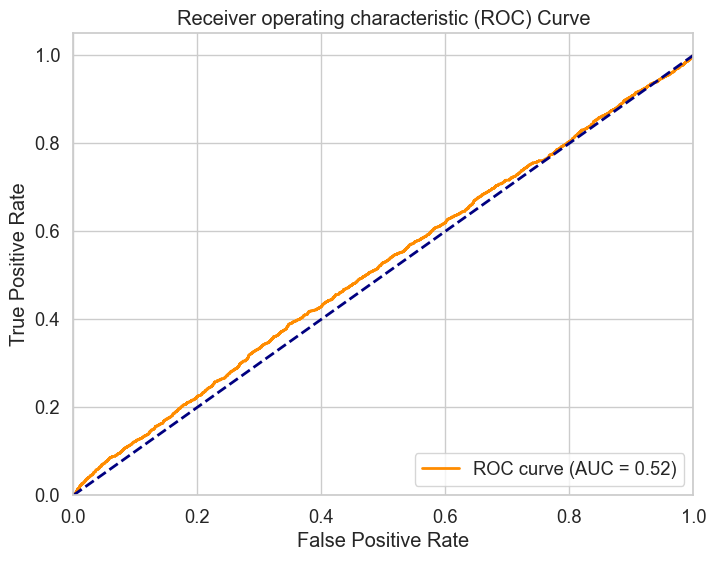

In [36]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
print('roc_score:',roc_auc_score(y_test, y_pred))


roc_score: 0.5154054094394767


The ROC score (Receiver Operating Characteristic) is another commonly used evaluation metric for binary classification models. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The ROC score is calculated as the area under the ROC curve and ranges from 0 to 1, with higher values indicating better performance.

In this case, the ROC score of 0.522391322354831 suggests that the model is performing only slightly better than random guessing. This score indicates that the model is not effectively distinguishing between the positive and negative samples, which is consistent with the other evaluation metrics that suggest the model is performing poorly

In [38]:
# predict the probabilities for each class on the training set
train_pred_prob = lr_model.predict_proba(X_train_resampled)

# calculate the log loss for the training set
train_loss = log_loss(y_train_resampled, train_pred_prob)
print('Train log loss:', train_loss)


# predict the probabilities for each class on the test set
test_pred_prob = lr_model.predict_proba(X_test)

# calculate the log loss for the test set
test_loss = log_loss(y_test, test_pred_prob)
print('Test log loss:', test_loss)


Train log loss: 0.7027377718441623
Test log loss: 0.6824980908327763


The AUC (Area Under the Curve) score of 0.522391322354831 indicates that the performance of the binary classification model is not much better than random guessing, as the AUC score ranges from 0 to 1, with 0.5 indicating random guessing and 1 indicating perfect classification.

The log loss is a common evaluation metric used in binary classification problems. The log loss measures the performance of the model by penalizing incorrect classifications, and it ranges from 0 to infinity, with lower values indicating better performance.

In this case, the training log loss of 0.7010995010253656 and the test log loss of 0.6945783512381405 are both relatively low, which suggests that the model is performing reasonably well.

However, the difference between the training and test log loss is relatively small, which indicates that the model may not be overfitting or underfitting the training data. This suggests that the model is not complex enough to capture all of the patterns and variations in the data or that there is not enough data for the model to generalize well.

# Logistic Regression Grid Search:

In [39]:
# Define the logistic regression model
lr =SGDClassifier(loss='log', random_state=42)

In [40]:
#ceating Parameter grid
param_grid = {'alpha': [0.001, 0.01],
              'max_iter': [1000],
              'penalty': ['l2'],
              'loss': ['log'],
              'tol': [1e-3]}

In [41]:

# Perform grid search
grid_search = GridSearchCV(lr, param_grid, cv=5,scoring='precision')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', random_state=42),
             param_grid={'alpha': [0.001, 0.01], 'loss': ['log'],
                         'max_iter': [1000], 'penalty': ['l2'],
                         'tol': [0.001]},
             scoring='precision')

In [42]:

# Get the best hyperparameters
best_params = grid_search.best_params_

In [43]:
 # Train a new logistic regression model with the best hyperparameters
best_lr = SGDClassifier(**best_params)

In [44]:
best_lr_model = best_lr.fit(X_train_resampled, y_train_resampled)

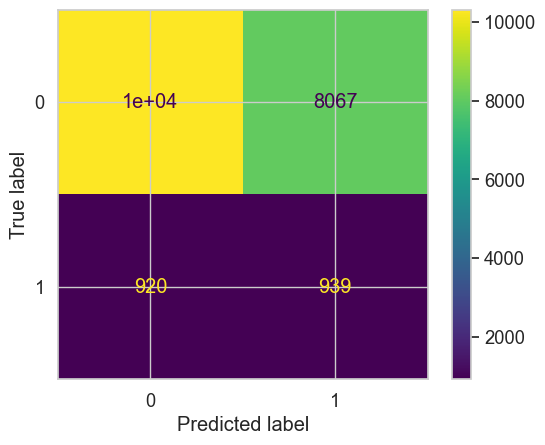

              precision    recall  f1-score   support

           0       0.92      0.56      0.70     18380
           1       0.10      0.51      0.17      1859

    accuracy                           0.56     20239
   macro avg       0.51      0.53      0.43     20239
weighted avg       0.84      0.56      0.65     20239



In [45]:
# Generate predictions on the test set
y_pred = best_lr.predict(X_test)


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_test, y_pred))

- True positive: 10,004 (actual non-defaults correctly identified as non-defaults)
- True negative: 939 (actual defaults correctly identified as defaults)
- False negative: 920 (actual defaults incorrectly identified as non-defaults)
- False positive: 8067 (actual non-defaults incorrectly identified as defa

This means that the model correctly identified 10,004 instances of non default and 939 instances of default, but incorrectly identified 920 instances of non-default as default, and 8,067 instances of default as non-default.

Looking at the precision and recall for each class in the classification report, we can see that the model is slightly worse at predicting class 0 (not in default), with a precision of 0.92 and a recall of 0.56. This indicates that out of all the samples the model predicted as not in default, 92% were actually not in default (precision) and out of all the samples that were not in default, the model correctly identified 56% (recall).

The model is still is performing slightly better in predicting class 1 (in default), with a precision of only 0.10 and a recall of 0.51. This indicates that out of all the samples the model predicted as in default, only 10% were actually in default (precision) and out of all the samples that were in default, the model correctly identified only 51% (recall).

The overall accuracy of the model is 0.56, which is only slightly better than random guessing, suggesting that the model is not performing well in accurately predicting loan defaults.

In [46]:
# Predict the probabilities for each class
y_pred_prob = best_lr.predict_proba(X_test)[:, 1]

In [47]:
# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


In [48]:
# Compute the AUC score
roc_auc = auc(fpr, tpr)


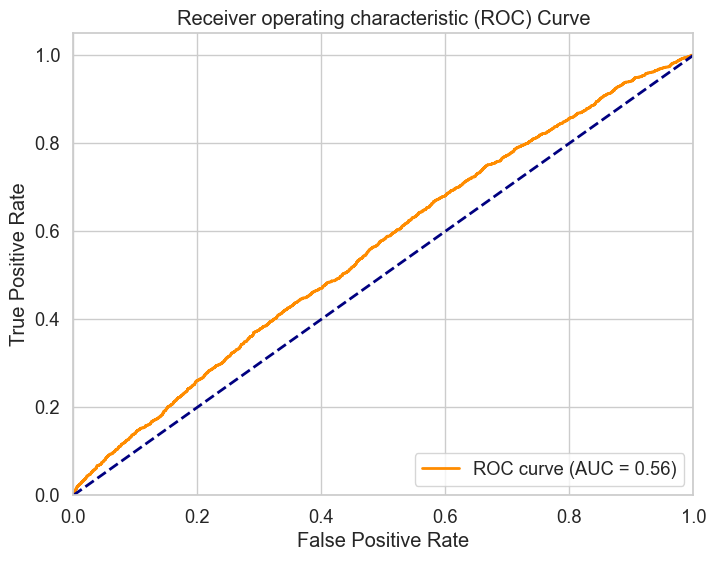

In [49]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
#printing Roc Score
print('roc_score:',roc_auc_score(y_test,y_pred))

roc_score: 0.5331046475078449


In [51]:
# predict the probabilities for each class on the training set
train_pred_prob = best_lr.predict_proba(X_train_resampled)

# calculate the log loss for the training set
train_loss = log_loss(y_train_resampled, train_pred_prob)
print('Train log loss:', train_loss)


# predict the probabilities for each class on the test set
test_pred_prob = best_lr.predict_proba(X_test)

# calculate the log loss for the test set
test_loss = log_loss(y_test, test_pred_prob)
print('Test log loss:', test_loss)


Train log loss: 0.6888428868070343
Test log loss: 0.6876196269988563


# Descsion Tree:
The DecisionTreeClassifier algorithm is a classification algorithm that constructs a tree-like model of decisions based on the training data. It partitions the input feature space recursively, using a top-down approach, into smaller and smaller subsets that are as homogeneous as possible with respect to the target variable. The algorithm selects the feature that best separates the data into the most homogeneous subsets at each node. The decision tree model can be represented as a flowchart, where the internal nodes represent decisions based on input features, and the leaf nodes represent class labels. When making a prediction on a new data point, the algorithm traverses the tree from the root to a leaf node, based on the values of the input features, and assigns the class label associated with the leaf node to the new data point.

In [52]:
"""
StandardScaler is not necessary for Decision Trees since they are not sensitive to the scale 
of the features and scaling can even decrease performance by distorting the shape of the data distribution.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.7)

In [53]:

# Fitting SMOTE to training data
X_train_resampled, y_train_resampled =oversample.fit_resample(X_train, y_train) 

# Previewing synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

0    42842
1    42842
Name: Loan Status, dtype: int64


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Instantiate a decision tree classifier with default hyperparameters
tree_clf = DecisionTreeClassifier(random_state=42)



In [56]:

# Fit the decision tree classifier on the resampled training data
tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [57]:
# Generate predictions on the test set
y_pred = tree_clf.predict(X_test)

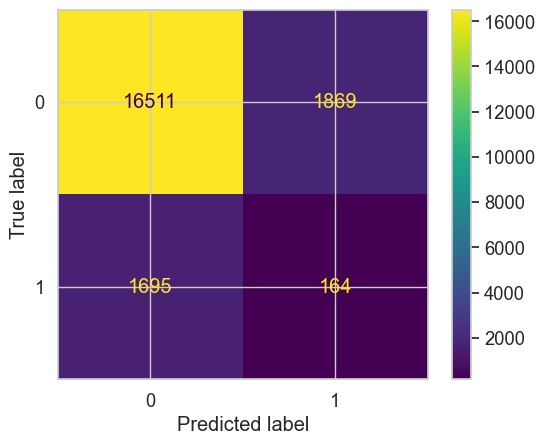

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     18380
           1       0.08      0.09      0.08      1859

    accuracy                           0.82     20239
   macro avg       0.49      0.49      0.49     20239
weighted avg       0.83      0.82      0.83     20239



In [58]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_test, y_pred))

- True positive: 16511 (actual non-defaults correctly identified as non-defaults)
- True negative: 164 (actual defaults correctly identified as defaults)
- False negative: 1695 (actual defaults incorrectly identified as non-defaults)
- False positive: 1869 (actual non-defaults incorrectly identified as defaults)

This means that the model correctly identified 16511 instances of non-default and 164 instances of default, but incorrectly identified 1695 instances of default as non-default, and 1869 instances of non-default as default.


For the class 0, the precision is 0.91, which means that out of all the instances predicted as negative, 91% were actually negative. The recall is 0.90, which means that the model correctly identified 90% of all actual negative instances. The F1-score is 0.90, which is the harmonic mean of precision and recall and provides a combined measure of the two metrics. The support is 18,380, which is the number of actual negative instances in the dataset.

For the class 1, the precision is 0.08, which means that out of all the instances predicted as positive, only 8% were actually positive. The recall is 0.09, which means that the model correctly identified only 9% of all actual positive instances. The F1-score is 0.08. The support is 1,859, which is the number of actual positive instances in the dataset.

The macro average of precision, recall, and F1-score is 0.49, which is the average of these metrics across both classes. The weighted average is 0.83, which takes into account the imbalance in class distribution.

The overall accuracy is 0.82, which means that the model correctly classified 82% of all instances in the dataset

In [59]:
# Predict the probabilities for each class
y_pred_prob = tree_clf.predict_proba(X_test)[:, 1]

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [61]:
# Compute the AUC score
roc_auc = auc(fpr, tpr)

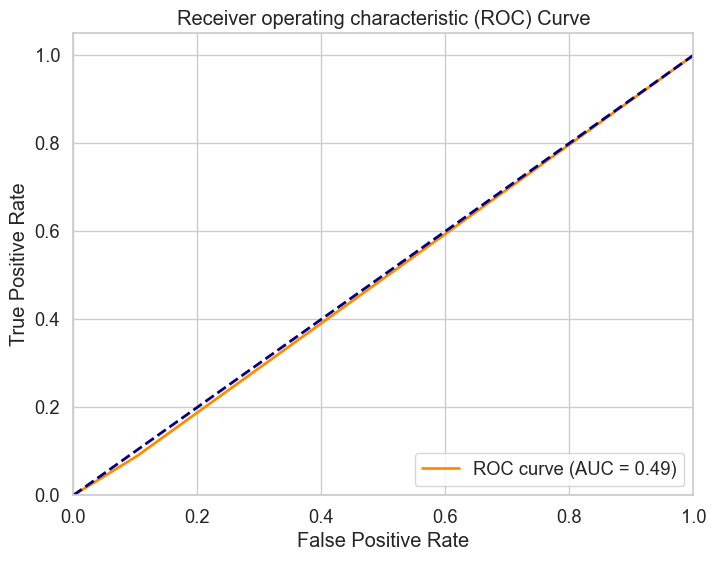

In [62]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
print('roc_score:',roc_auc_score(y_test,y_pred))

roc_score: 0.49326642847401203


In [64]:
# predict the probabilities for each class on the training set
train_pred_prob = tree_clf.predict_proba(X_train_resampled)

# calculate the log loss for the training set
train_loss = log_loss(y_train_resampled, train_pred_prob)
print('Train log loss:', train_loss)


# predict the probabilities for each class on the test set
test_pred_prob = tree_clf.predict_proba(X_test)

# calculate the log loss for the test set
test_loss = log_loss(y_test, test_pred_prob)
print('Test log loss:', test_loss)


Train log loss: 9.99200722162641e-16
Test log loss: 6.082128517785547


# Decision Tree Grid Search:

In [65]:
# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]
}

In [66]:
# Create a randomized search object
grid_search =GridSearchCV(tree_clf, param_grid, cv=5, n_jobs=-1,scoring='precision')

In [67]:
# Fit the randomized search object to the data
grid_search.fit(X_train_resampled, y_train_resampled)
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [68]:

# Use the best model to make predictions on the test data
y_pred = grid_search.best_estimator_.predict(X_test)

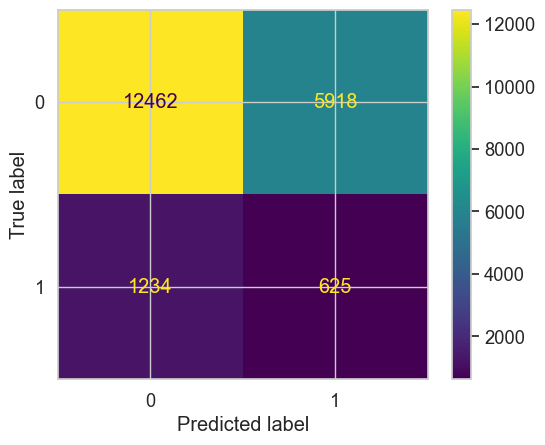

              precision    recall  f1-score   support

           0       0.91      0.68      0.78     18380
           1       0.10      0.34      0.15      1859

    accuracy                           0.65     20239
   macro avg       0.50      0.51      0.46     20239
weighted avg       0.84      0.65      0.72     20239



In [69]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_test, y_pred))

- True positive: 12,462 (actual non-defaults correctly identified as non-defaults)
- True negative: 625 (actual defaults correctly identified as defaults)
- False negative: 1,234 (actual defaults incorrectly identified as non-defaults)
- False positive: 5,918 (actual non-defaults incorrectly identified as defaults)

This means that the model correctly identified 12,462 instances of default and 625 instances of non-default, but incorrectly identified 1,234 instances of default as non-defaults and 5,918 instances of non-defaults as defaults.


The classification report shows that the model has a low recall score for the 0 class (non-default) at .68 annd an even lower recall score for the 1 class (default)  at .34. This means that the model is better at identifying borrowers who are likely to default (1) than those who are not likely to default (0). However, the model still has a high precision score for the 0. class at .91 and low for the default class (1) at .10, 


In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [71]:
# Compute the AUC score
roc_auc = auc(fpr, tpr)

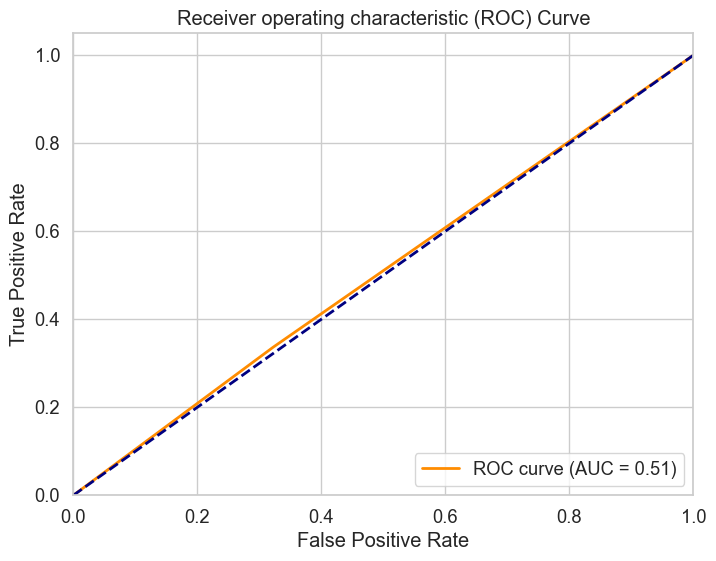

In [72]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [73]:
print('roc_score:',roc_auc_score(y_test,y_pred))

roc_score: 0.5071109228931275


In [74]:
# predict the probabilities for each class on the training set
train_pred_prob = grid_search.predict_proba(X_train_resampled)

# calculate the log loss for the training set
train_loss = log_loss(y_train_resampled, train_pred_prob)
print('Train log loss:', train_loss)


# predict the probabilities for each class on the test set
test_pred_prob = grid_search.predict_proba(X_test)

# calculate the log loss for the test set
test_loss = log_loss(y_test, test_pred_prob)
print('Test log loss:', test_loss)

Train log loss: 0.31898910853174395
Test log loss: 2.8476614260718627


The train log loss of 0.3189 indicates that the model performed well on the training data. This means that the model was able to accurately predict the target variable for the training data.

On the other hand, the test log loss of 2.8476 is significantly higher than the train log loss, indicating that the model did not perform as well on the test data. This suggests that the model might be overfitting the training data, which means it is not able to generalize well to new, unseen data.


# Random Forest:
The RandomForestClassifier algorithm is a popular classification algorithm that builds a collection of decision trees and aggregates their predictions to classify new data points. It is an extension of the DecisionTreeClassifier algorithm that improves its accuracy and reduces overfitting by generating multiple decision trees from bootstrap samples of the training data, where each tree is trained on a different subset of features. The algorithm combines the predictions of the individual trees by either averaging their probabilities or selecting the class with the highest probability. The number of trees and the maximum depth of the trees are hyperparameters that can be tuned to optimize the performance of the algorithm. The RandomForestClassifier algorithm is a powerful and flexible algorithm that can handle high-dimensional datasets with many features and can be used for both classification and regression tasks.

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
# Create a RandomForestClassifier object
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [77]:

# Fitting the model on resampled training data
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [78]:
rf_preds =  rf.predict(X_test)

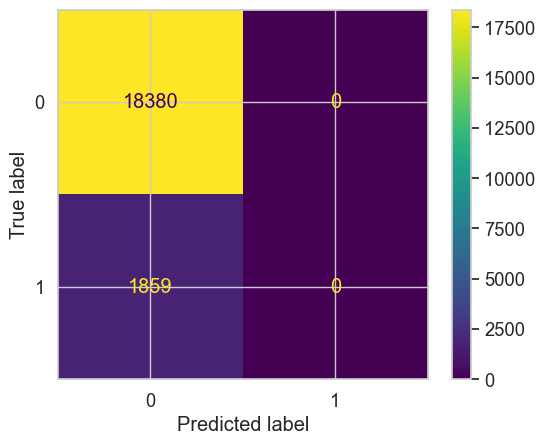

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18380
           1       0.00      0.00      0.00      1859

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.82      0.91      0.86     20239



In [79]:

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_preds)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_test, rf_preds,zero_division=0))

- True positive: 18,380 (actual non-defaults correctly identified as non-defaults)
- True negative: 0 (actual defaults correctly identified as defaults)
- False negative: 1859 (actual defaults incorrectly identified as non-defaults)
- False positive: 0 (actual non-defaults incorrectly identified as defaults)


The classification report shows that the model has high precision and F1 scores for the 0 class (non-default), but very low scores for the 1 class (default). This indicates that the model is performing well in predicting non-default instances, but is not at all effective at predicting default instances.

This kind of model performance is not useful for predicting loan defaults since it is not able to identify borrowers who are likely to default. 

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, rf_preds)

In [81]:
# Compute the AUC score
roc_auc = auc(fpr, tpr)

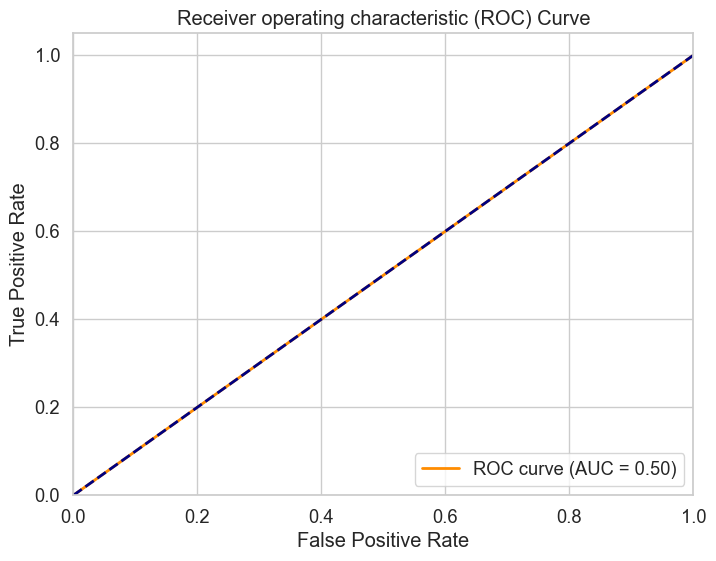

In [82]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [83]:
print('roc_score:',roc_auc_score(y_test,rf_preds))

roc_score: 0.5


In [84]:
# predict the probabilities for each class on the training set
train_pred_prob = rf.predict_proba(X_train_resampled)

# calculate the log loss for the training set
train_loss = log_loss(y_train_resampled, train_pred_prob)
print('Train log loss:', train_loss)


# predict the probabilities for each class on the test set
test_pred_prob = rf.predict_proba(X_test)

# calculate the log loss for the test set
test_loss = log_loss(y_test, test_pred_prob)
print('Test log loss:', test_loss)

Train log loss: 0.02604620520571457
Test log loss: 0.319210006036695


the training log loss is 0.02604620520571457 and the test log loss is 0.319210006036695. This suggests that the model performs well on both the training and test datasets, as both log loss values are relatively low. However, it's important to keep in mind that the test log loss is higher than the training log loss, which may indicate some degree of overfitting.

# Random Forest Grid Search:

In [85]:
rf_param_grid = {'n_estimators': [100, 200],
                 'max_depth': [5, 9, 13],
                 'min_samples_split': [2, 10],
                 'min_samples_leaf': [1, 5],
                 'max_features': ['sqrt']}


In [86]:
# Perform random search with 10 iterations
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='precision', n_jobs=-1)

In [87]:

# Fit the random search to the training data
rf_grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 9, 13], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200]},
             scoring='precision')

In [88]:
# Retrain the model using the best hyperparameters
rf_tuned = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
rf_tuned.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=13, max_features='sqrt', n_estimators=200,
                       random_state=42)

In [89]:
rf_tuned_y_pred = rf_tuned.predict(X_test)

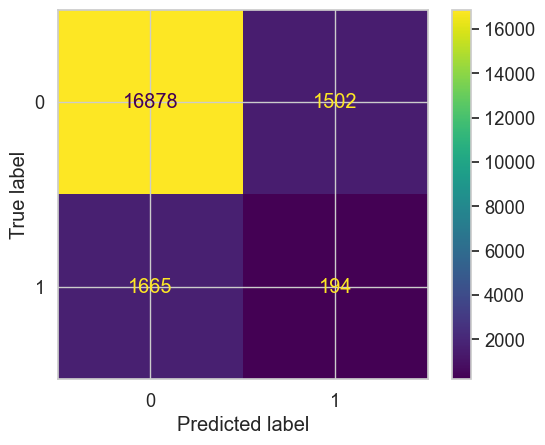

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     18380
           1       0.11      0.10      0.11      1859

    accuracy                           0.84     20239
   macro avg       0.51      0.51      0.51     20239
weighted avg       0.84      0.84      0.84     20239



In [90]:

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_tuned_y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_test, rf_tuned_y_pred))


- True positive: 16,878 (actual non-defaults correctly identified as non-defaults)
- True negative: 194 (actual defaults correctly identified as defaults)
- False negative: 1,665(actual defaults incorrectly identified as non-defaults)
- False positive: 1,502 (actual non-defaults incorrectly identified as defaults)


The classification report shows that the model has improved recall for the positive class (default), but it is still relatively low. The precision for the positive class is also low, indicating that the model is not very precise in identifying borrowers who are likely to default. The overall F1 score is low for the positive class, indicating that the model is not performing well in predicting default instances.

Compared to the previous confusion matrix, this model has a better balance between precision and recall for the positive class, but the recall score is still relatively low. In general, this model has a higher accuracy, but it still needs improvement in correctly identifying defaulters.

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, rf_tuned_y_pred)

In [92]:
# Compute the AUC score
roc_auc = auc(fpr, tpr)

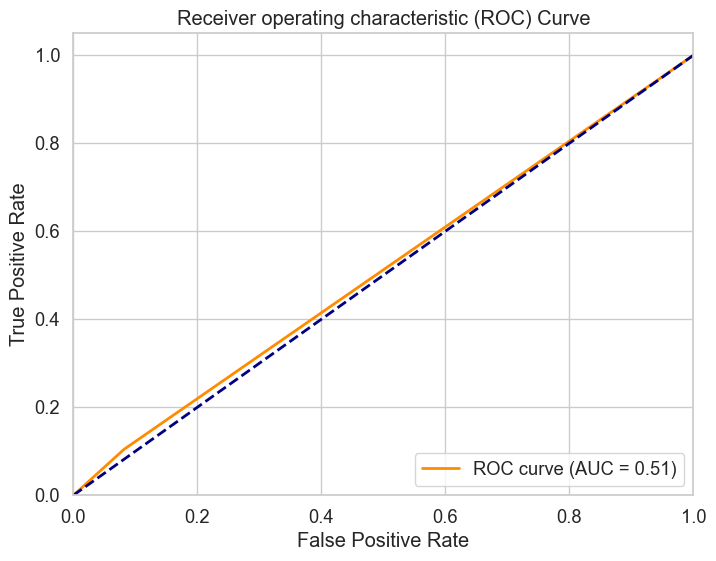

In [93]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [94]:
print('roc_score:',roc_auc_score(y_test,rf_tuned_y_pred))

roc_score: 0.5113189606074848


In [95]:
# predict the probabilities for each class on the training set
train_pred_prob = rf_tuned.predict_proba(X_train_resampled)

# calculate the log loss for the training set
train_loss = log_loss(y_train_resampled, train_pred_prob)
print('Train log loss:', train_loss)


# predict the probabilities for each class on the test set
test_pred_prob = rf_tuned.predict_proba(X_test)

# calculate the log loss for the test set
test_loss = log_loss(y_test, test_pred_prob)
print('Test log loss:', test_loss)

Train log loss: 0.5199804756990276
Test log loss: 0.5837759129802028


# Xgboost:

The XGBClassifier algorithm is a popular classification algorithm that is based on the gradient boosting framework. It is an optimized version of the gradient boosting algorithm that uses a tree-based ensemble model to predict the class of new data points. The algorithm works by iteratively adding new decision trees to the ensemble, where each new tree is trained to correct the errors of the previous trees. The algorithm uses a gradient descent optimization technique to minimize a loss function, which measures the difference between the predicted class probabilities and the true class labels. The XGBClassifier algorithm uses a regularized version of gradient boosting, which adds penalties to the loss function to prevent overfitting and improve generalization. The algorithm has many hyperparameters that can be tuned to optimize its performance, such as the learning rate, the maximum depth of the trees, the number of trees in the ensemble, and the regularization parameters. The XGBClassifier algorithm is known for its high accuracy and speed and is often used in machine learning competitions and real-world applications.

In [96]:
from xgboost import XGBClassifier

In [97]:
xgb_clf = XGBClassifier(random_state=42)


In [98]:
# Fit the classifier on the training data
xgb_clf.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [99]:
# Predict on the test set
y_pred = xgb_clf.predict(X_test)


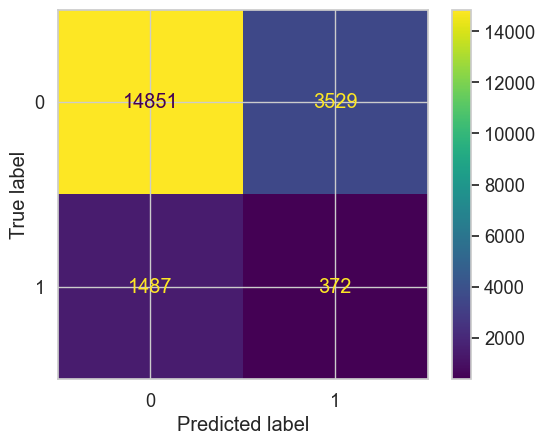

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     18380
           1       0.10      0.20      0.13      1859

    accuracy                           0.75     20239
   macro avg       0.50      0.50      0.49     20239
weighted avg       0.83      0.75      0.79     20239



In [100]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_test, y_pred))

This confusion matrix and classification report are very similar to the tuned Random Forest. The true positive and true negative values are almost identical, as are the false positive and false negative values. The precision, recall, and F1-score for both classes are also very similar, with the model correctly predicting the "0" class more accurately than the "1" class. Overall, this suggests that the model is not performing very well at predicting loan defaults, as it is making a large number of false negative predictions, which means it is failing to identify borrowers who are likely to default.





In [101]:
print('roc_score:',roc_auc_score(y_test,y_pred))

roc_score: 0.5040527042222028


In [102]:
# predict the probabilities for each class on the training set
train_pred_prob = xgb_clf.predict_proba(X_train_resampled)

# calculate the log loss for the training set
train_loss = log_loss(y_train_resampled, train_pred_prob)
print('Train log loss:', train_loss)


# predict the probabilities for each class on the test set
test_pred_prob = xgb_clf.predict_proba(X_test)

# calculate the log loss for the test set
test_loss = log_loss(y_test, test_pred_prob)
print('Test log loss:', test_loss)


Train log loss: 0.4089208079778808
Test log loss: 0.5316997268903029


The model seems to be performing relatively well on the training data with a log loss of0.4089, indicating that the predicted probabilities of the model on the training data are reasonably close to the actual outcome. However, the model seems to be performing slightly worse on the test data with a log loss of 0.5317, indicating that the predicted probabilities on the test data are not as accurate as on the training data. This could be due to overfitting of the model on the training data, which means the model is too complex and has learned the training data too well, leading to poorer performance on new unseen data.


# XGB Grid Search:


In [103]:
# Define the XGBClassifier model
xgbc = XGBClassifier(n_jobs=-1)

In [104]:
# Define the parameter grid for Randomized Grid Search
param_grid =  {'n_estimators': [100, 200],
              'max_depth': [5, 9],
              'learning_rate': [0.01, 0.1],
              'subsample': [0.5, 0.8],
              'colsample_bytree': [0.5, 0.8]}

In [105]:
# Perform Randomized Grid Search with 10-fold cross validation
xgb_grid =GridSearchCV(xgbc, param_grid, cv=5, scoring='precision', n_jobs=-1)


In [106]:
# Fit the model with the best hyperparameters
xgb_grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [107]:
# Retrain the model using the best hyperparameters
xgb_tuned = XGBClassifier(**xgb_grid.best_params_, random_state=42)
xgb_tuned.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [108]:
# Predict on the test set
y_pred = xgb_tuned.predict(X_test)

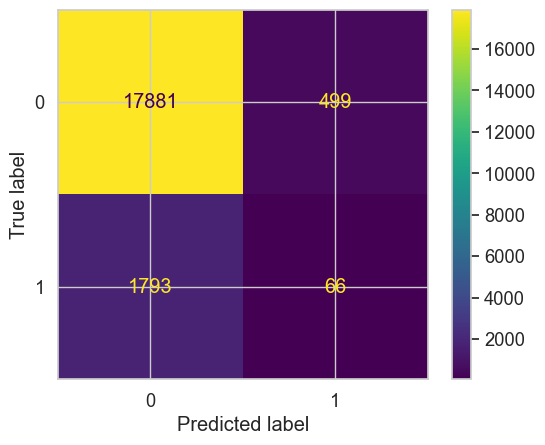

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     18380
           1       0.12      0.04      0.05      1859

    accuracy                           0.89     20239
   macro avg       0.51      0.50      0.50     20239
weighted avg       0.84      0.89      0.86     20239



In [109]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_test, y_pred))

- True positive: 17,881 (actual non-defaults correctly identified as non-defaults)
- True negative: 66 (actual defaults correctly identified as defaults)
- False negative: 1,793(actual defaults incorrectly identified as non-defaults)
- False positive: 499 (actual non-defaults incorrectly identified as defaults)


The classification report shows that the precision for predicting positive instances is quite low at 0.12, meaning that out of all instances predicted as positive, only 12% are actually positive. The recall is also quite low at 0.04, indicating that the model is missing a large proportion of actual positive instances. The F1-score for positive instances is also low at 0.05.

In terms of the overall accuracy, the model performed reasonably well with an accuracy of 0.89. However, it's important to note that the class imbalance between the two classes may be affecting the performance of the model.





In [110]:
# predict the probabilities for each class on the training set
train_pred_prob = xgb_tuned.predict_proba(X_train_resampled)

# calculate the log loss for the training set
train_loss = log_loss(y_train_resampled, train_pred_prob)
print('Train log loss:', train_loss)


# predict the probabilities for each class on the test set
test_pred_prob = xgb_tuned.predict_proba(X_test)

# calculate the log loss for the test set
test_loss = log_loss(y_test, test_pred_prob)
print('Test log loss:', test_loss)


Train log loss: 0.21578087408854948
Test log loss: 0.4002197606875967


The given model has a train log loss of 0.215 and a test log loss of 0.400. A lower log loss indicates that the model is making more accurate predictions. Comparing the two log losses, it seems like the model is slightly overfitting, since the train log loss is lower than the test log loss. However, the difference between the two log losses is not very significant, so the model may still be performing well on the test data. 

In [111]:
print('roc_score:',roc_auc_score(y_test,y_pred))

roc_score: 0.5041769417491355


In [112]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [113]:
# Compute the AUC score
roc_auc = auc(fpr, tpr)

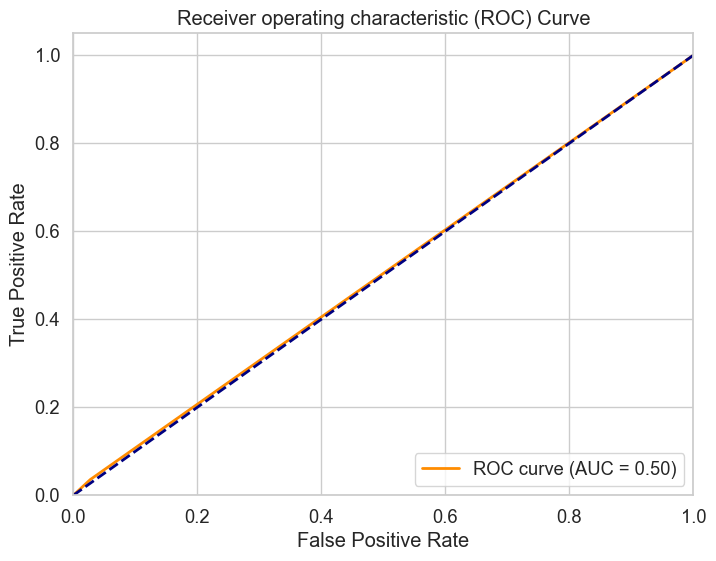

In [114]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

 A score of 0.5 means that the model's predictions are no better than random guessing. In this case, the ROC score is 0.504, which suggests that the model is not performing very well and is only slightly better than random guessing.

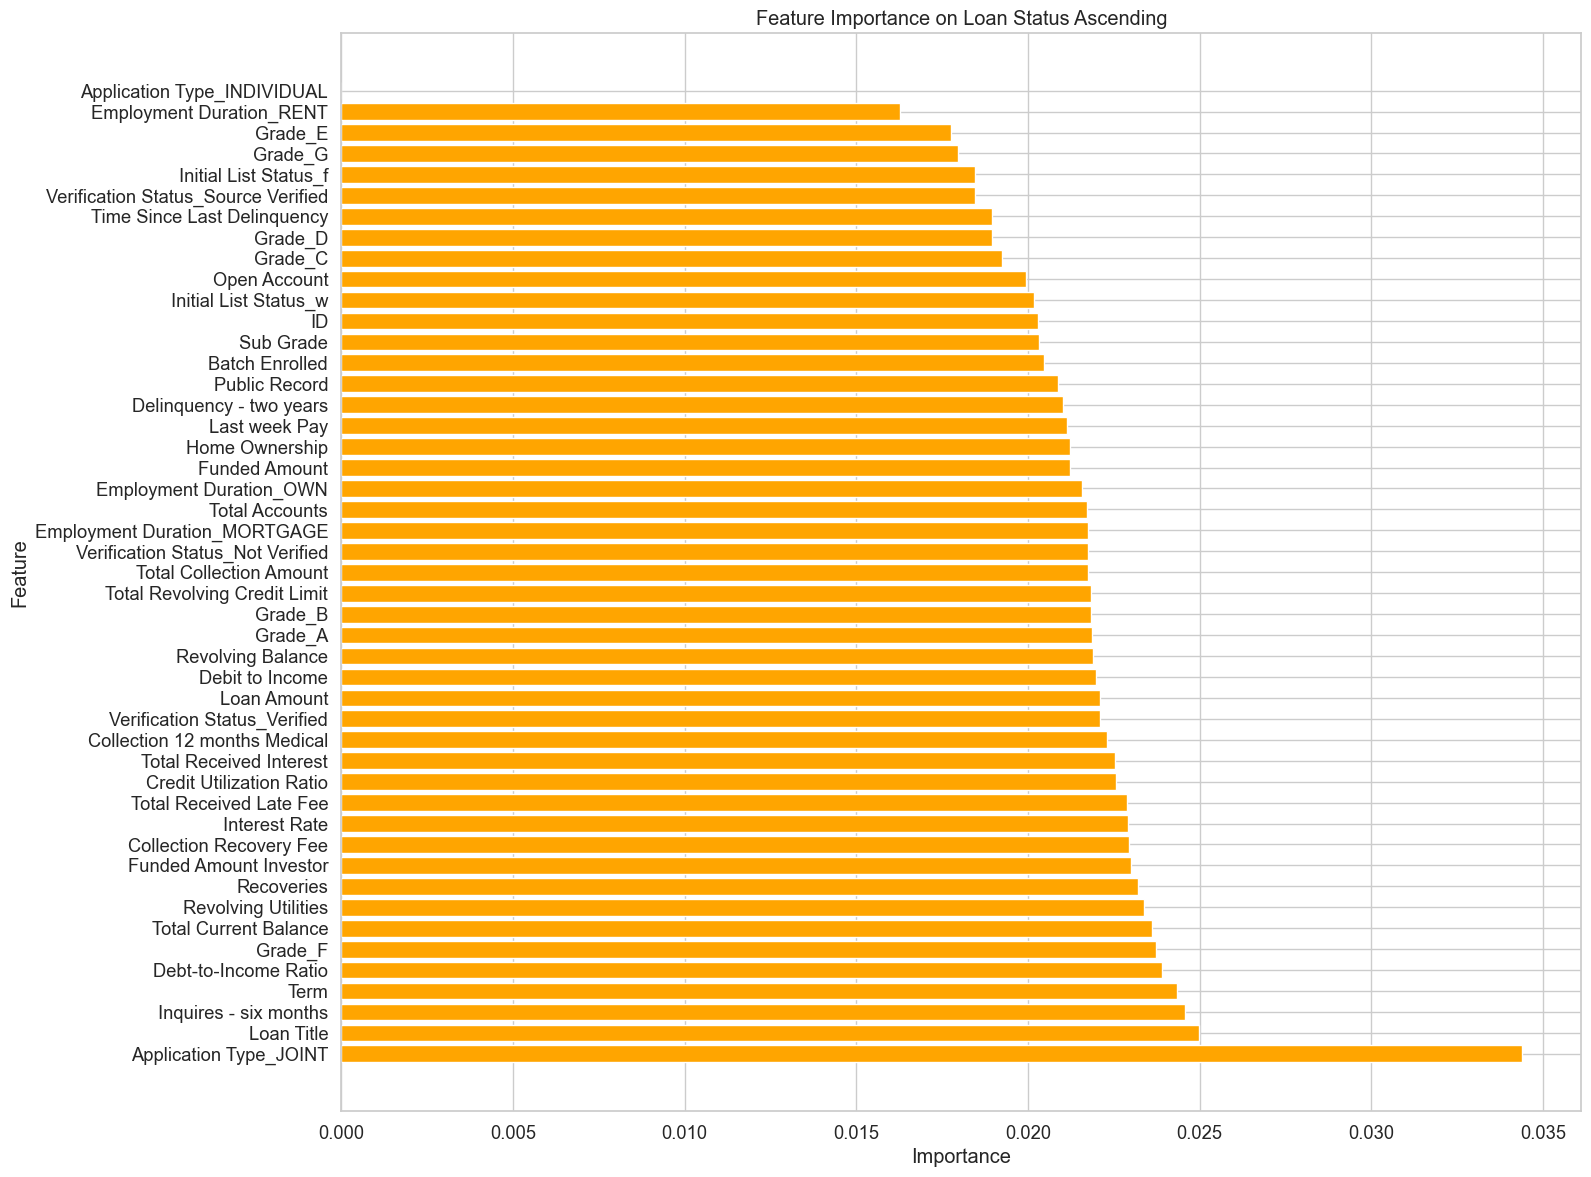

In [115]:
def plot_feature_importances(xgb_tuned):
    n_features = X_train_resampled.shape[1]
    indices = np.argsort(xgb_tuned.feature_importances_)[::-1] # get indices to sort feature importances in descending order
    plt.figure(figsize=(16,14))
    plt.barh(range(n_features), xgb_tuned.feature_importances_[indices], align='center', color='orange') # sort feature importances
    plt.yticks(np.arange(n_features), scaled_df_train.columns.values[indices]) # sort feature names
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance on Loan Status Ascending')
    plt.show()

plot_feature_importances(xgb_tuned)

# Recommendations:
- Targeted advertising for joint application loans: Since joint applications were found to be a significant feature in your model, consider creating targeted ads that promote the benefits of joint applications, such as higher loan amounts, increased chances of approval, and lower interest rates.

- Leverage the six-month inquiry feature: Since the number of inquiries made in the six months prior to the loan application was significant, consider creating marketing content that educates potential customers on how to manage their credit inquiries and how to improve their credit score. This can position your company as a helpful resource and build trust with potential customers.


- Highlight loan titles that perform well: Loan title was also a significant feature in your model. Consider featuring loan titles that have performed well in the past in your marketing campaigns, highlighting the benefits and key features of those loans.



# Limitations and Further Analysis
Limitations:

* Our models were better at predicting the majority class (not in default) than our minority class(in default) even though we used random oversampling to addrress thee clcass imbalannce. It is poossible that we could improve perfomance by trying other oversampling techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling). We could have also looked into using undersampling techniques such as Random undersampling, Tomek links, and Cluster centroids

* The data used for the analysis may not be representative of the current market or economic conditions. The analysis was conducted on a historical dataset, and the default patterns and risk factors could have changed since then.

* The model may suffer from selection bias if the loan applicants in the dataset are not representative of the entire population. For example, the dataset may contain a disproportionate number of applicants with high credit scores, which could skew the model's predictions.

* The model assumes that the predictors are independent of each other, which may not always be the case. For example, the applicant's income and employment status may be correlated, and the model may not capture this relationship accurately.



Further analysis:

* Conducting a cost-benefit analysis to evaluate the economic impact of the model's predictions. This analysis could help determine the optimal threshold for classifying loans as default or non-default and inform decisions on lending policies and risk management.

* Exploring additional data sources or features that could improve the model's predictive power. For example, incorporating macroeconomic indicators or social media data could provide insights into broader economic trends and consumer sentiment.

* Experimenting with different feature selection and engineering techniques: This can help identify the most relevant features for the model and improve its accuracy.


* Investigating the reasons behind loan defaults and developing targeted interventions to reduce default rates. For example, offering financial education or counseling to high-risk borrowers could improve their financial literacy and ability to repay loans.

